In [ ]:
# Description : Images classifier for cifar10 dataset

In [ ]:
# Import the Libraries
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv2D , MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [ ]:
# Load the Data
from keras.datasets import cifar10
(x_train , y_train),(x_test , y_test)= cifar10.load_data()

In [ ]:
# Look at the data types and variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Get the the shape of the arrays
print('x train shape : ', x_train.shape)
print('y train shape : ', y_train.shape)
print('x test shape : ', x_test.shape)
print('y test shape : ', y_test.shape)

x train shape :  (50000, 32, 32, 3)
y train shape :  (50000, 1)
x test shape :  (10000, 32, 32, 3)
y test shape :  (10000, 1)


In [ ]:
# Take look at the first image as an array
index = 7
x_train[index]

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]

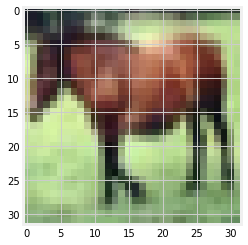

In [ ]:
# show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
# Get the image label
print('the image label is :', y_train[index])

the image label is : [7]


In [ ]:
# Get the image classification
classification = ['airplane', 'autombile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
# print the image class
print('the image class is : ' , classification[y_train[index][0]])

the image class is :  horse


In [ ]:
# convert the label into a set of 10 numbers to input into the neural network
y_train_one_hot= to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# print the new label of image / picture above
print('the one hot label is : ', y_train_one_hot[index])

the one hot label is :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Normalize the pixels to be values between 0 and 1.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[index]

array([[[0.10980392, 0.1372549 , 0.15294118],
        [0.11764706, 0.13333333, 0.17254902],
        [0.12941176, 0.17254902, 0.18431373],
        ...,
        [0.16862745, 0.21960784, 0.17647059],
        [0.20392157, 0.25098039, 0.20784314],
        [0.18039216, 0.22745098, 0.18431373]],

       [[0.10588235, 0.11764706, 0.14901961],
        [0.10588235, 0.10980392, 0.16078431],
        [0.08235294, 0.12156863, 0.15294118],
        ...,
        [0.43921569, 0.53333333, 0.38039216],
        [0.45882353, 0.54901961, 0.39607843],
        [0.45098039, 0.54117647, 0.39215686]],

       [[0.13333333, 0.14117647, 0.16470588],
        [0.12941176, 0.12941176, 0.16862745],
        [0.09411765, 0.11764706, 0.15686275],
        ...,
        [0.68627451, 0.81568627, 0.56078431],
        [0.69411765, 0.81960784, 0.56470588],
        [0.69019608, 0.81568627, 0.56078431]],

       ...,

       [[0.55686275, 0.69019608, 0.4627451 ],
        [0.55686275, 0.69019608, 0.4627451 ],
        [0.58823529, 0

In [ ]:
# Create the model architecture
model = Sequential()

# Add the first convolution layer
model.add(Conv2D(32,(5,5),activation='relu' , input_shape= (32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolution layer
model.add(Conv2D(32,(5,5),activation='relu')) 


# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattern layer
model.add(Flatten()) 

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# # Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# # Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              801000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)             

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train_one_hot, 
          batch_size= 128,
          epochs = 12,
          validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 4s 103us/step - loss: 1.7386 - accuracy: 0.3433 - val_loss: 1.4819 - val_accuracy: 0.4715
Epoch 2/12
40000/40000 [==============================] - 3s 65us/step - loss: 1.3584 - accuracy: 0.5072 - val_loss: 1.2512 - val_accuracy: 0.5500
Epoch 3/12
40000/40000 [==============================] - 3s 66us/step - loss: 1.2034 - accuracy: 0.5691 - val_loss: 1.1024 - val_accuracy: 0.6056
Epoch 4/12
40000/40000 [==============================] - 3s 65us/step - loss: 1.1083 - accuracy: 0.6076 - val_loss: 1.1153 - val_accuracy: 0.6088
Epoch 5/12
40000/40000 [==============================] - 3s 65us/step - loss: 1.0177 - accuracy: 0.6387 - val_loss: 1.0212 - val_accuracy: 0.6443
Epoch 6/12
40000/40000 [==============================] - 3s 65us/step - loss: 0.9519 - accuracy: 0.6637 - val_loss: 0.9576 - val_accuracy: 0.6631
Epoch 7/12
40000/40000 [==============================] - 3s 66us/s

In [ ]:
# Evaluate the model using the test data set
score= model.evaluate(x_test, y_test_one_hot)

print(score[0])
print(score[1])

10000/10000 [==============================] - 1s 80us/step
0.9257497063636779
0.6858999729156494


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


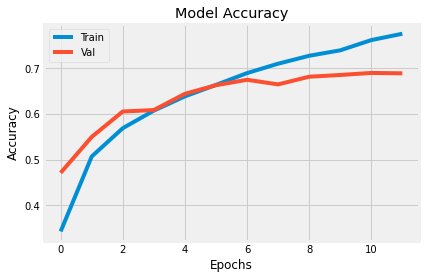

In [ ]:
# Visualize the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc= 'upper left')
plt.show()


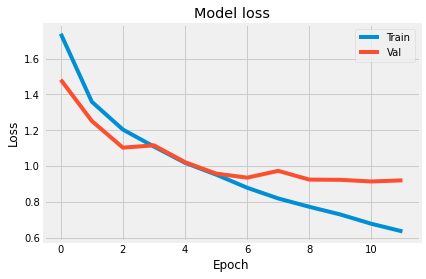

In [ ]:
# Visualize the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Test the model with an example
from google.colab import files
uploaded = files.upload()

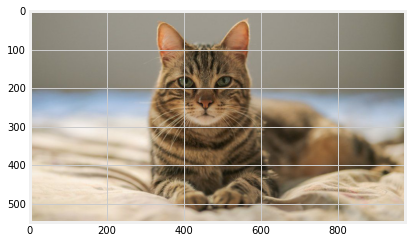

In [ ]:
# show the image
#new_image = plt.imread('/content/cat img.jpg')
#img = plt.imshow(new_image)

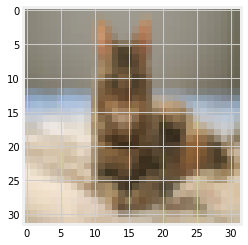

In [ ]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# Get the model predictions
#predictions = model.predict(np.array([resized_image]))
# show the predictions
#predictions


array([[9.09346738e-04, 1.49474276e-04, 2.31121331e-01, 4.53493774e-01,
        8.29821303e-02, 7.16772750e-02, 1.44148424e-01, 1.28983585e-02,
        1.65234634e-03, 9.67448228e-04]], dtype=float32)

In [ ]:
# sort the predictions from least to greatest
#list_index = [0, 1,2 ,3 ,4 , 5 ,6 ,7 ,8 ,9]
#x= predictions
#for i in range(10):
  #for j in range(10):
    #if x[0][list_index[i]] > x[0][list_index[j]]:
      #temp = list_index[i]
      #list_index[i] = list_index[j]
      #list_index[j] = temp

# show the sorted labels in order
#print(list_index)

[3, 2, 6, 4, 5, 7, 8, 9, 0, 1]


In [ ]:
# print the fist 5 predictions
#for i in range(5):
  #print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2 ), '%')

cat : 45.35 %
bird : 23.11 %
frog : 14.41 %
deer : 8.3 %
dog : 7.17 %


In [ ]:
model.save("model.h5")
print('saved')

saved


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
# preprocessing
def load_img(filename):
  img = load_img(filename, grayscale = True , target_size= (32,32)) 
  img= img_to_array(img)
  #reshape the img to single image with one channel
  #img = img.reshape(1,32,32,1)
  #preparing to pixel data
  img = img.astype('float32')
  img = img/ 255.0
  return img

def run_example():
  #loading img
  img = load_img('/content/cat img.jpg')
  #Loading the model
  model= load_model('/content/model.h5')
  #prediction the class
  result = model.predict_classes(img)
  print('the result is : ', result[0])

# entry point, run the example
run_example()


TypeError: ignored